In [5]:
%cd ..
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [17]:
df = pd.read_csv('Data/task4_pca.csv')
target = pd.read_csv('Data/task3.csv', usecols=['gap'])
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.255777,0.815605,0.002508,-0.612576,-0.213957,-0.588145,0.596564,0.254575,-0.301733,0.442173,...,0.152546,0.050875,0.110884,-0.037524,-0.004560,-0.015151,-0.080247,0.006934,0.039078,-0.006961
1,-1.706624,-0.951865,0.060851,0.920544,-0.042316,-0.173811,-0.503692,-0.391010,0.139137,-0.514053,...,-0.029922,0.166157,-0.201048,0.120456,-0.050829,-0.175222,-0.008575,-0.242336,-0.000227,-0.315437
2,-0.587665,0.992612,-0.038965,-1.108119,-0.451943,-0.129426,0.063850,0.170873,-0.622775,0.006511,...,0.020313,-0.035185,-0.004248,-0.176182,0.100866,-0.024951,-0.246199,0.184809,-0.048892,0.020693
3,0.338451,-0.607034,0.595298,0.037144,-0.604036,0.377177,0.362455,0.624512,-0.038873,0.465726,...,-0.088955,0.060431,0.239982,0.174959,0.035542,0.000513,-0.046797,0.110455,-0.043908,0.107224
4,0.789061,-0.337771,-0.206018,0.283863,1.063902,0.807538,-0.462337,0.176439,-0.710081,-0.294219,...,0.108089,-0.054179,0.129532,-0.036512,0.073828,0.025315,0.068780,-0.016750,0.171260,-0.062829
5,0.663113,-0.533639,0.872949,-0.482630,-0.483830,-0.363281,0.134886,0.730862,0.114448,-0.428245,...,0.020340,-0.074477,0.066898,-0.176768,0.065408,-0.199392,0.043271,-0.104888,-0.094292,-0.058512
6,0.958748,0.685680,0.887471,0.668573,-0.551102,-0.130780,0.040137,-0.312245,-0.039908,0.108282,...,0.162332,0.059215,0.157400,-0.069236,-0.008505,0.030704,-0.020114,-0.015712,0.005740,-0.141214
7,0.467351,-0.200584,0.035322,-0.240812,0.198998,0.118777,-0.055622,0.777364,-0.651489,-0.169702,...,-0.092683,0.020875,0.038632,0.116570,-0.104612,0.098403,0.036981,-0.031584,-0.024797,-0.083902
8,-0.282667,1.470919,-0.494011,-1.028729,0.192921,-0.229390,-0.169536,0.095693,-0.529907,-0.105065,...,-0.056717,0.035411,-0.051393,-0.256031,0.046157,-0.205466,-0.270509,0.163329,0.020425,-0.089129
9,-0.185046,-0.264186,-0.342598,0.362979,1.385262,1.213182,0.232363,0.895549,-0.777526,-0.303508,...,0.042047,-0.050883,0.091747,-0.140217,0.004785,0.102611,0.050376,-0.107568,-0.059216,0.101767


In [28]:
quartiles = target.quantile([0.33, 0.66])
q1 = quartiles.iloc[0]
q2 = quartiles.iloc[1]
labels = np.where(target < q1, 0, np.where(target < q2, 1, 2))

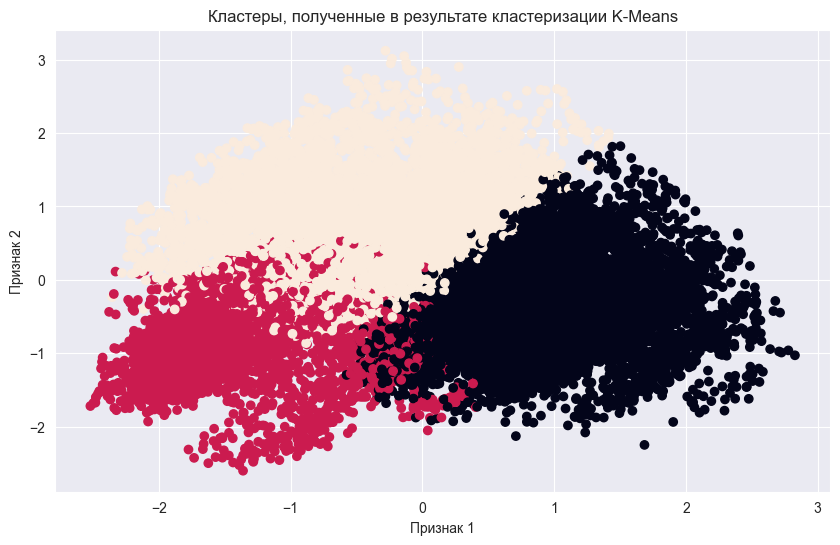

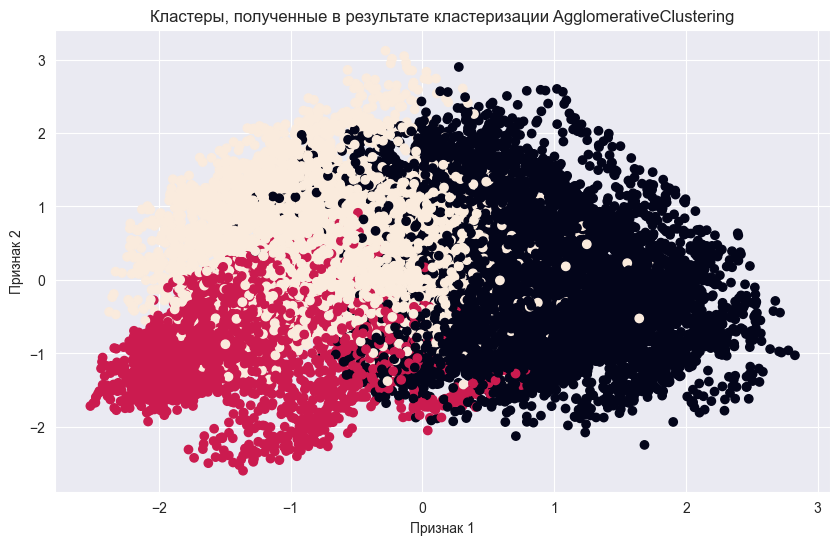

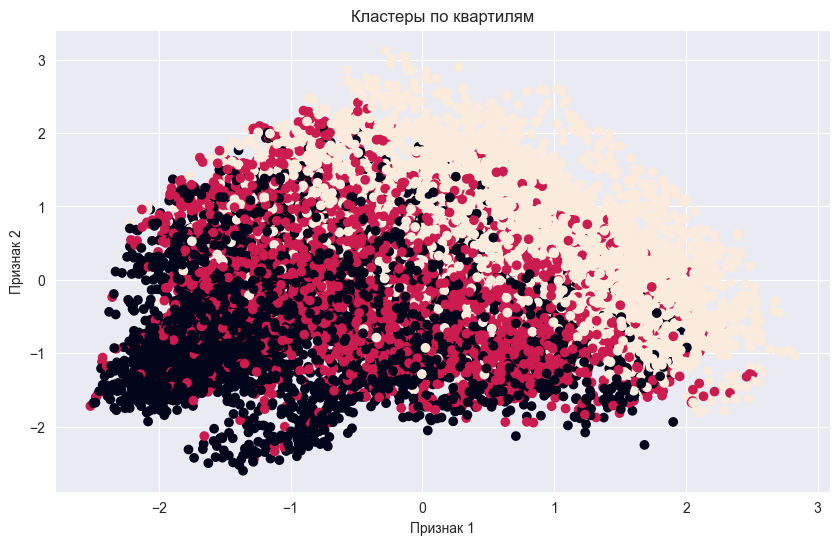

In [53]:
kmeans = KMeans(init="random", n_clusters=3,
                n_init=10,max_iter=300,random_state=42)
clusters_kmeans = kmeans.fit_predict(df)

agglomerative = AgglomerativeClustering(n_clusters=3, linkage="ward")
clusters_agglomerative = agglomerative.fit_predict(df)

plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_kmeans)
plt.title('Кластеры, полученные в результате кластеризации K-Means')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_agglomerative)
plt.title('Кластеры, полученные в результате кластеризации AgglomerativeClustering')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.title('Кластеры по квартилям')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

Silhouette Score (Коэффициент Силуэта): Это метрика, которая измеряет близость каждого объекта внутри своего кластера и удаленность от объектов в соседних кластерах. Значение коэффициента силуэта варьируется от -1 до 1, где значения ближе к 1 указывают на хорошую кластеризацию.
Adjusted Rand Index (ARI): Это индекс, который измеряет сходство между двумя разбиениями данных, независимо от их масштаба. Значения ARI варьируются от -1 до 1, где значения ближе к 1 указывают на лучшее сходство между двумя разбиениями.

In [55]:
silhouette_avg_quatiles = metrics.silhouette_score(df, labels.ravel())
silhouette_avg_kmeans = metrics.silhouette_score(df, clusters_kmeans.ravel())
silhouette_avg_agglomerative = metrics.silhouette_score(df, clusters_agglomerative.ravel())
adjusted_rand_kmeans = metrics.adjusted_rand_score(labels.ravel(), clusters_kmeans.ravel())
adjusted_rand_agglomerative = metrics.adjusted_rand_score(labels.ravel(), clusters_agglomerative.ravel())
print('Средний коэффициент силуэта по квартилям:', round(silhouette_avg_quatiles, 4), 
      '\nСредний коэффициент силуэта по kmeans:', round(silhouette_avg_kmeans, 4),
      '\nСредний коэффициент силуэта по agglomerative:', round(silhouette_avg_agglomerative, 4),
      '\nARI по kmeans:', round(adjusted_rand_kmeans, 4),
      '\nARI по agglomerative:', round(adjusted_rand_agglomerative, 4))

Средний коэффициент силуэта по квартилям: 0.0206 
Средний коэффициент силуэта по kmeans: 0.1137 
Средний коэффициент силуэта по agglomerative: 0.0908 
ARI по kmeans: 0.0668 
ARI по agglomerative: 0.1002


1. Коэффициент силуэта для метода кластеризации kmeans оказался значительно выше, чем для метода agglomerative и предполагаемых правдивых меток по квартилям, что говорит о лучшей внутрикластерной связности и отделения кластеров друг от друга при использовании метода kmeans.
2. ARI для метода agglomerative выше, чем для метода kmeans, что указывает на более точное совпадение кластеризации с истинной разметкой данных при использовании метода agglomerative, если мы счиатем, что правдивыми метками является разделение по квартилям.